<a href="https://colab.research.google.com/github/TheJVPS/ProjetoAplicadoFaculdadeXP/blob/main/Projeto_Aplicado_XP_educa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def gerar_dados_maker(num_registros=500):
    """
    Gera um DataFrame com dados simulados para um laboratório Maker.

    Args:
        num_registros (int): O número de linhas (registros) a serem geradas.

    Returns:
        pandas.DataFrame: O DataFrame com os dados simulados.
    """
    # Listas de dados para simular
    estudantes = [f'Estudante_{i}' for i in range(1, 21)]
    materiais = [
        'Filamento PLA', 'Filamento ABS', 'Resina SLA', 'Placa de MDF',
        'Placa de Acrílico', 'Motor de Passo', 'Servo Motor',
        'Protoboard', 'Raspberry Pi', 'Arduino UNO', 'LED',
        'Resistor', 'Sensor Ultrassônico'
    ]
    custo_unitario_medio = {
        'Filamento PLA': 100, 'Filamento ABS': 120, 'Resina SLA': 250,
        'Placa de MDF': 30, 'Placa de Acrílico': 50, 'Motor de Passo': 60,
        'Servo Motor': 45, 'Protoboard': 15, 'Raspberry Pi': 200,
        'Arduino UNO': 80, 'LED': 1, 'Resistor': 0.5, 'Sensor Ultrassônico': 20
    }
    estoque_inicial = {
        'Filamento PLA': 50, 'Filamento ABS': 40, 'Resina SLA': 30,
        'Placa de MDF': 100, 'Placa de Acrílico': 80, 'Motor de Passo': 75,
        'Servo Motor': 90, 'Protoboard': 200, 'Raspberry Pi': 25,
        'Arduino UNO': 50, 'LED': 500, 'Resistor': 1000, 'Sensor Ultrassônico': 120
    }

    # Gerando os dados aleatórios
    dados = {
        'Nome do Estudante': np.random.choice(estudantes, num_registros),
        'Material Usado': np.random.choice(materiais, num_registros),
        'Quantidade Usada': np.random.randint(1, 10, num_registros)
    }

    df = pd.DataFrame(dados)

    # Adicionando o Custo Unitário e calculando Custo Total e Estoque Restante
    df['Custo Unitario'] = df['Material Usado'].map(custo_unitario_medio)
    df['Custo Total'] = df['Quantidade Usada'] * df['Custo Unitario']
    df['Estoque Restante'] = df.apply(
        lambda row: estoque_inicial.get(row['Material Usado'], 0) - row['Quantidade Usada'],
        axis=1
    )

    # Gerando datas aleatórias nos últimos 6 meses
    hoje = datetime.now()
    seis_meses_atras = hoje - timedelta(days=180)
    datas_aleatorias = [
        seis_meses_atras + timedelta(days=np.random.randint(0, 180))
        for _ in range(num_registros)
    ]
    df['Data de Uso'] = datas_aleatorias

    # Ordenando por data
    df = df.sort_values(by='Data de Uso').reset_index(drop=True)

    # Selecionando as colunas finais
    df = df[['Nome do Estudante', 'Material Usado', 'Quantidade Usada', 'Custo Unitario', 'Custo Total', 'Data de Uso', 'Estoque Restante']]

    return df

# Gerar o DataFrame
df_dados_maker = gerar_dados_maker()

# Salvar o DataFrame em um arquivo CSV
nome_arquivo = 'controle_lab_maker.csv'
df_dados_maker.to_csv(nome_arquivo, index=False)

print(f'Arquivo "{nome_arquivo}" gerado com sucesso!')
print('As primeiras 5 linhas do arquivo são:')
print(df_dados_maker.head())

Arquivo "controle_lab_maker.csv" gerado com sucesso!
As primeiras 5 linhas do arquivo são:
  Nome do Estudante     Material Usado  Quantidade Usada  Custo Unitario  \
0       Estudante_9           Resistor                 8             0.5   
1      Estudante_15      Filamento PLA                 5           100.0   
2       Estudante_6      Filamento PLA                 6           100.0   
3      Estudante_11  Placa de Acrílico                 6            50.0   
4      Estudante_11       Raspberry Pi                 2           200.0   

   Custo Total                Data de Uso  Estoque Restante  
0          4.0 2025-02-23 15:13:12.480987               992  
1        500.0 2025-02-24 15:13:12.480987                45  
2        600.0 2025-02-25 15:13:12.480987                44  
3        300.0 2025-02-25 15:13:12.480987                74  
4        400.0 2025-02-26 15:13:12.480987                23  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

In [ ]:
print("\n=== Estatísticas Descritivas ===")
print(df.describe())

print("\n=== Top 5 Materiais Mais Utilizados ===")
print(df['Material Usado'].value_counts().head(5))

print("\n=== Top 5 Alunos que Mais Consomem ===")
print(df['Nome do Estudante'].value_counts().head(5))

print("\n=== Custo Total por Material ===")
print(df.groupby('Material Usado')['Custo Total'].sum().sort_values(ascending=False).head(10))


=== Estatísticas Descritivas ===
       Quantidade Usada  Custo Unitario  Custo Total  \
count            500.00          500.00       500.00   
mean               5.07           76.30       386.34   
min                1.00            0.50         0.50   
25%                3.00           20.00        78.75   
50%                5.00           50.00       240.00   
75%                7.00          120.00       480.00   
max                9.00          250.00      2250.00   
std                2.55           73.57       468.94   

                         Data de Uso  Estoque Restante  
count                            500            500.00  
mean   2025-05-24 03:39:07.680986368            174.71  
min       2025-02-23 15:13:12.480987             16.00  
25%    2025-04-12 15:13:12.480986880             37.00  
50%    2025-05-25 03:13:12.480986880             74.00  
75%    2025-07-06 15:13:12.480986880            118.00  
max       2025-08-21 15:13:12.480987            999.00  
std  

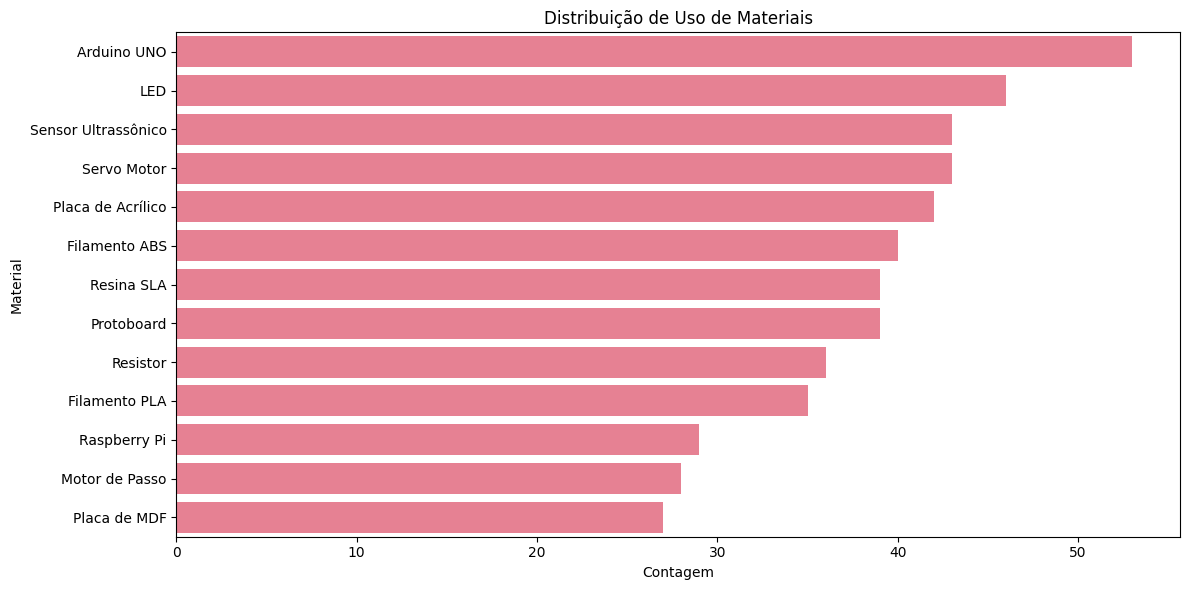

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico de distribuição de uso dos materiais
plt.figure(figsize=(12, 6))
sns.countplot(y='Material Usado', data=df, order=df['Material Usado'].value_counts().index)
plt.title('Distribuição de Uso de Materiais')
plt.xlabel('Contagem')
plt.ylabel('Material')
plt.tight_layout()
plt.savefig('distribuicao_de_uso.png')
plt.show()

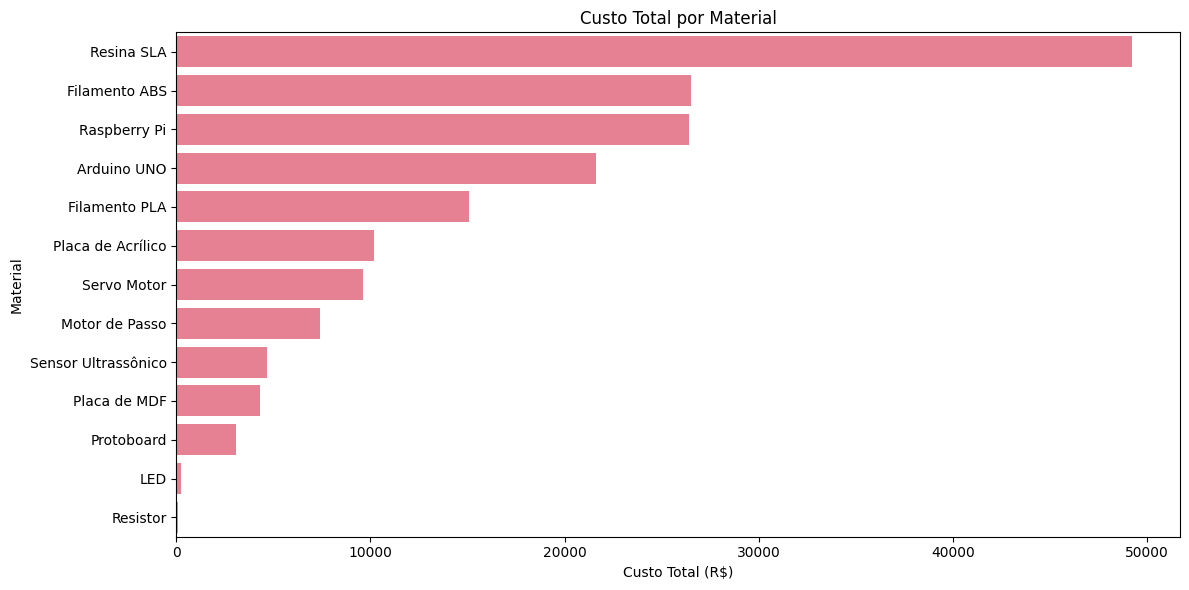

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico de custo total por material
plt.figure(figsize=(12, 6))
custo_por_material = df.groupby('Material Usado')['Custo Total'].sum().sort_values(ascending=False)
sns.barplot(x=custo_por_material.values, y=custo_por_material.index)
plt.title('Custo Total por Material')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Material')
plt.tight_layout()
plt.savefig('custo_total.png')
plt.show()

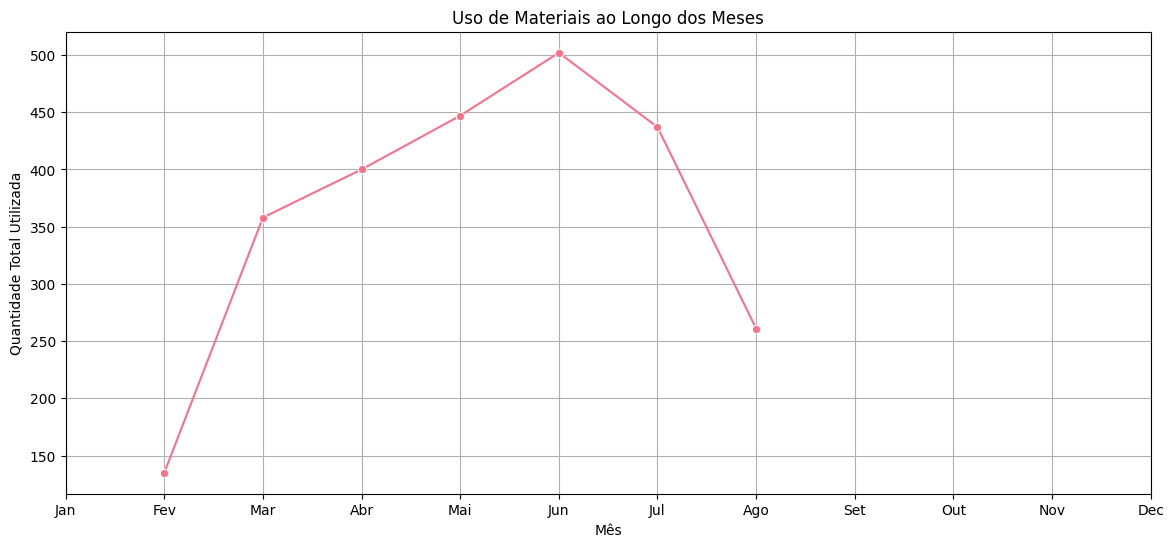

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico de uso de materiais por mês
plt.figure(figsize=(14, 6))
df['Mês'] = df['Data de Uso'].dt.month
uso_mensal = df.groupby('Mês')['Quantidade Usada'].sum()
sns.lineplot(x=uso_mensal.index, y=uso_mensal.values, marker='o')
plt.title('Uso de Materiais ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Quantidade Total Utilizada')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('uso_mes.png')
plt.show()

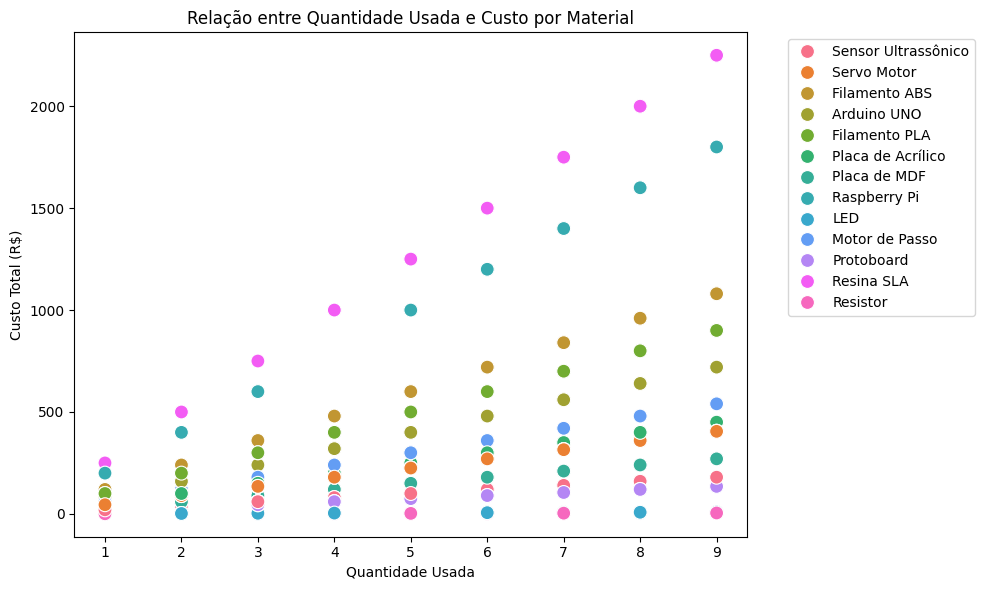

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico de relação entre quantidade e custo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantidade Usada', y='Custo Total', hue='Material Usado', data=df, s=100)
plt.title('Relação entre Quantidade Usada e Custo por Material')
plt.xlabel('Quantidade Usada')
plt.ylabel('Custo Total (R$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('quantidade_x_custo.png')
plt.show()

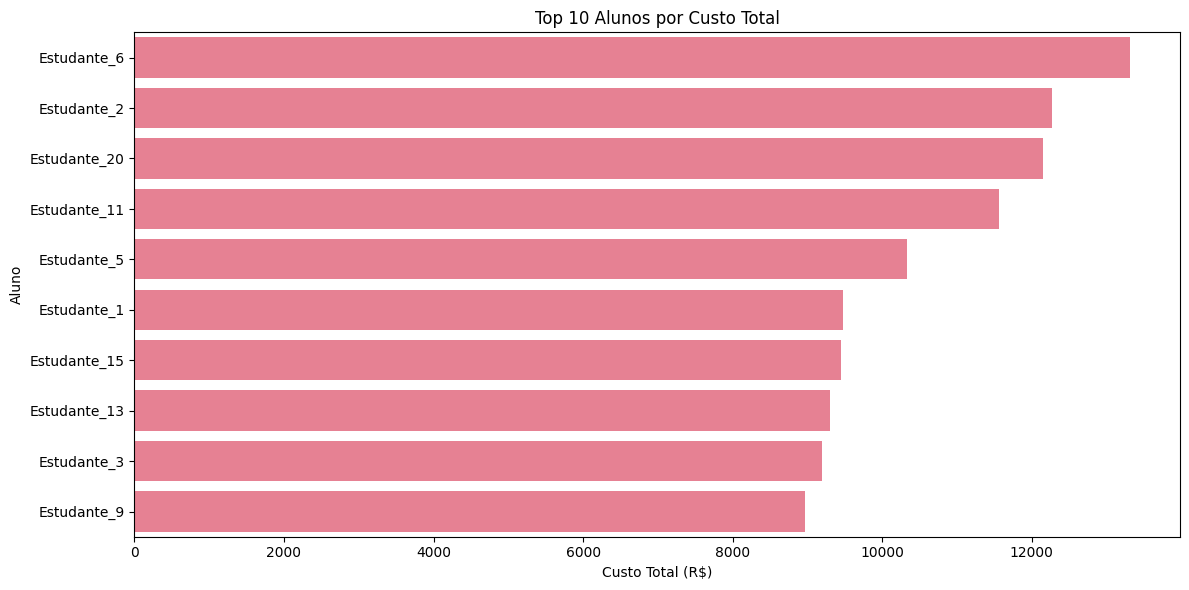

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico com o top 10 de alunos que mais usaram materiais
plt.figure(figsize=(12, 6))
top_alunos = df.groupby('Nome do Estudante')['Custo Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_alunos.values, y=top_alunos.index)
plt.title('Top 10 Alunos por Custo Total')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Aluno')
plt.tight_layout()
plt.savefig('top10.png')
plt.show()


=== Correlação entre Quantidade e Custo ===
                  Quantidade Usada  Custo Total
Quantidade Usada              1.00         0.38
Custo Total                   0.38         1.00


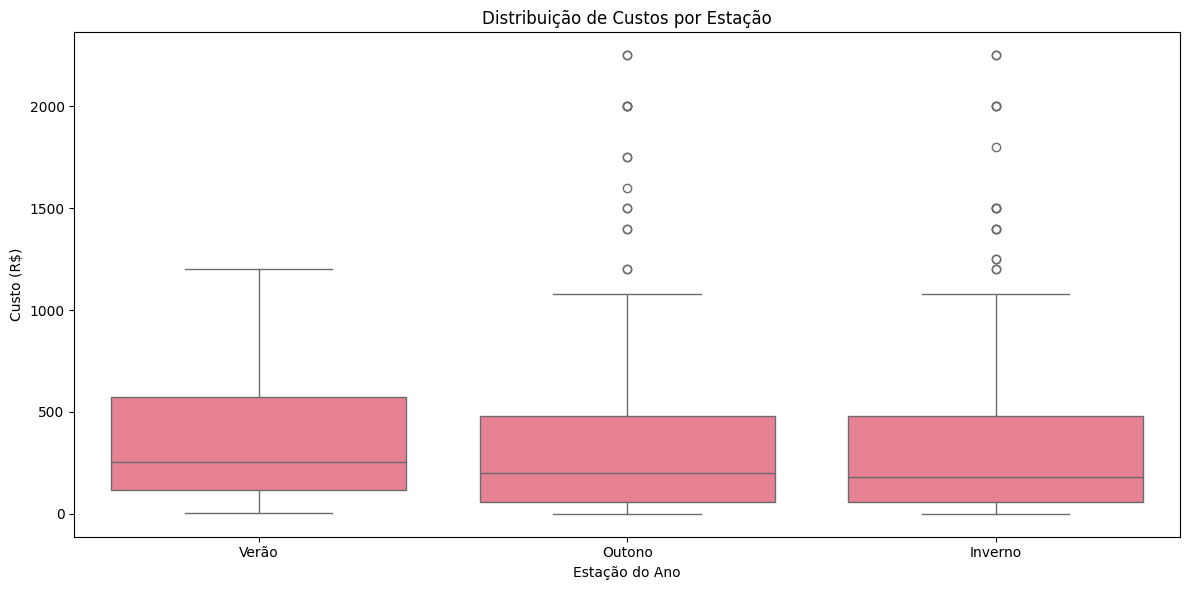

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração de estilo
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Carregar os dados
df = pd.read_csv('controle_lab_maker.csv', parse_dates=['Data de Uso'])

#Gráfico de custo por estação
# Correlação entre quantidade e custo
correlacao = df[['Quantidade Usada', 'Custo Total']].corr()
print("\n=== Correlação entre Quantidade e Custo ===")
print(correlacao)

# Materiais por estação (testando H5)
df['Estação'] = df['Data de Uso'].dt.month.apply(lambda x: 'Verão' if x in [1,2,12] else
                                                'Outono' if x in [3,4,5] else
                                                'Inverno' if x in [6,7,8] else 'Primavera')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Estação', y='Custo Total', data=df)
plt.title('Distribuição de Custos por Estação')
plt.ylabel('Custo (R$)')
plt.xlabel('Estação do Ano')
plt.tight_layout()
plt.savefig('custo_estacao.png')
plt.show()

In [8]:
import pandas as pd

# 1. Ler o arquivo original, que agora tem custo unitário
df = pd.read_csv("controle_lab_maker.csv")

# 2. Visualizar as primeiras linhas
print("Prévia dos dados:")
print(df.head(), "\n")

# 3. Padronizar nomes de colunas
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# 4. Tratar valores ausentes (se houver)
df.fillna({
    "quantidade_usada": 0,
    "custo_unitario": 0,
    "custo_total": 0,
    "estoque_restante": 0
}, inplace=True)

# 5. Garantir tipos corretos
df["quantidade_usada"] = pd.to_numeric(df["quantidade_usada"], errors="coerce").fillna(0)
df["custo_unitario"] = pd.to_numeric(df["custo_unitario"], errors="coerce").fillna(0)
df["custo_total"] = pd.to_numeric(df["custo_total"], errors="coerce").fillna(0)
df["estoque_restante"] = pd.to_numeric(df["estoque_restante"], errors="coerce").fillna(0)

# 6. Criar variáveis derivadas (opcional)
# Podemos re-calcular o custo total para garantir consistência
df["custo_total_calculado"] = df["quantidade_usada"] * df["custo_unitario"]

# 7. Padronizar a coluna de data
if "data_de_uso" in df.columns:
    df["data_de_uso"] = pd.to_datetime(df["data_de_uso"], errors="coerce")

# 8. Exportar dados preparados
df.to_csv("uso_materiais_preparado.csv", index=False)

print("Arquivo 'uso_materiais_preparado.csv' gerado com sucesso!")
print("\nDados finais preparados:")
print(pd.read_csv("uso_materiais_preparado.csv").head())

Prévia dos dados:
  Nome do Estudante       Material Usado  Quantidade Usada  Custo Unitario  \
0       Estudante_9  Sensor Ultrassônico                 5           20.00   
1       Estudante_7          Servo Motor                 6           45.00   
2       Estudante_2        Filamento ABS                 5          120.00   
3       Estudante_2        Filamento ABS                 8          120.00   
4      Estudante_20        Filamento ABS                 6          120.00   

   Custo Total                 Data de Uso  Estoque Restante  
0       100.00  2025-02-22 19:32:26.191666               115  
1       270.00  2025-02-22 19:32:26.191666                84  
2       600.00  2025-02-22 19:32:26.191666                35  
3       960.00  2025-02-22 19:32:26.191666                32  
4       720.00  2025-02-23 19:32:26.191666                34   

Arquivo 'uso_materiais_preparado.csv' gerado com sucesso!

Dados finais preparados:
  nome_do_estudante       material_usado  quantid

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import datetime

# --- 1. CARREGAR E PREPARAR OS DADOS ---
# Carregamos os dados preparados do script anterior
df = pd.read_csv("uso_materiais_preparado.csv")

# Converter a coluna de data para o tipo datetime
df['data_de_uso'] = pd.to_datetime(df['data_de_uso'])

# Extrair o mês da data para usar como variável preditora
df['mes'] = df['data_de_uso'].dt.month

# --- 2. TREINAR E AVALIAR O MODELO DE MACHINE LEARNING ---
# Codificar a variável categórica 'material_usado'
encoder = OneHotEncoder(handle_unknown='ignore')
materiais_encoded = encoder.fit_transform(df[['material_usado']]).toarray()
materiais_df = pd.DataFrame(materiais_encoded, columns=encoder.get_feature_names_out(['material_usado']))

# Definir variáveis preditoras (X) e alvo (y)
features = ['mes'] + list(materiais_df.columns)
X = df[['mes']].join(materiais_df)
y = df['quantidade_usada']

# Dividir os dados em conjuntos de treino e teste (80/20)
# Isso garante uma avaliação justa da eficácia do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear com os dados de treino
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste para avaliar a performance
y_pred = modelo.predict(X_test)

# Calcular as métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de eficácia do modelo
print("="*50)
print("AVALIAÇÃO DE EFICÁCIA DO MODELO")
print("="*50)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")
print("="*50 + "\n")

# --- 3. FUNÇÃO PARA FAZER PREVISÕES E GERAR O RELATÓRIO ---
def gerar_relatorio_de_compra(mes, material, estoque_atual, custo_unitario_atual, estoque_seguranca):
    """
    Gera um relatório completo de previsão e recomendação de compra.

    Args:
        mes (int): O mês para o qual a previsão será feita (ex: 9 para Setembro).
        material (str): O nome exato do material (ex: 'Filamento PLA').
        estoque_atual (int): O número de unidades em estoque atualmente.
        custo_unitario_atual (float): O custo por unidade do material.
        estoque_seguranca (int): O estoque mínimo que você deseja manter.

    Returns:
        None: Imprime o relatório diretamente no console.
    """
    # 3.1. Pré-processar a entrada para o modelo
    cenario = pd.DataFrame(np.zeros((1, len(features))), columns=features)
    cenario['mes'] = mes

    coluna_material = f'material_usado_{material}'
    if coluna_material in cenario.columns:
        cenario[coluna_material] = 1
    else:
        print(f"Erro: O material '{material}' não foi encontrado nos dados de treino. Por favor, verifique a grafia.")
        return

    # 3.2. Fazer a previsão de demanda usando o modelo de ML
    demanda_prevista = modelo.predict(cenario)[0]

    # 3.3. Aplicar a lógica de negócio
    custo_estimado = demanda_prevista * custo_unitario_atual
    estoque_projetado = estoque_atual - demanda_prevista

    # 3.4. Gerar a recomendação de compra
    recomendacao = "Não é necessário comprar no momento."
    quantidade_a_comprar = 0

    if estoque_projetado < estoque_seguranca:
        recomendacao = "Recomendado comprar para manter o estoque de segurança."
        # Sugere a compra de unidades suficientes para atingir o estoque de segurança + a demanda prevista
        quantidade_a_comprar = (estoque_seguranca - estoque_projetado) + demanda_prevista

    # --- 4. EXIBIR O RELATÓRIO ---
    print("\n" + "="*50)
    print(f"RELATÓRIO DE GESTÃO PARA {material.upper()} - MÊS {mes}")
    print("="*50)
    print(f"Estoque Atual: {estoque_atual} unidades")
    print(f"Custo Unitário Atual: R${custo_unitario_atual:.2f}")
    print(f"Estoque de Segurança: {estoque_seguranca} unidades")
    print("-" * 50)
    print(f"** Demanda Prevista: {demanda_prevista:.2f} unidades **")
    print(f"** Custo Estimado: R${custo_estimado:.2f} **")
    print(f"** Estoque Projetado: {estoque_projetado:.2f} unidades **")
    print("-" * 50)
    print(f"Recomendação de Compra: {recomendacao}")
    if quantidade_a_comprar > 0:
        print(f"Quantidade Sugerida: {quantidade_a_comprar:.2f} unidades")
    print("="*50 + "\n")


# --- 5. EXECUÇÃO DO RELATÓRIO PARA UM CENÁRIO EXEMPLO ---
# Você pode alterar esses valores para testar diferentes cenários
mes_de_previsao = 12  # Mês de setembro
material_de_previsao = 'Filamento PLA'
estoque_atual_do_material = 5
custo_atual_do_material = 105.00
estoque_minimo_seguranca = 5

gerar_relatorio_de_compra(
    mes_de_previsao,
    material_de_previsao,
    estoque_atual_do_material,
    custo_atual_do_material,
    estoque_minimo_seguranca
)

AVALIAÇÃO DE EFICÁCIA DO MODELO
Erro Quadrático Médio (MSE): 6.44
Coeficiente de Determinação (R²): -0.02


RELATÓRIO DE GESTÃO PARA FILAMENTO PLA - MÊS 12
Estoque Atual: 5 unidades
Custo Unitário Atual: R$105.00
Estoque de Segurança: 5 unidades
--------------------------------------------------
** Demanda Prevista: 4.92 unidades **
** Custo Estimado: R$516.10 **
** Estoque Projetado: 0.08 unidades **
--------------------------------------------------
Recomendação de Compra: Recomendado comprar para manter o estoque de segurança.
Quantidade Sugerida: 9.83 unidades



Para a visualização do streamlit, é necessário rodar localmente.
Baixe o repositório presente na url: https://github.com/TheJVPS/ProjetoAplicadoFaculdadeXP

Depois, na pasta do projeto abra o CMD e execute o comando -> pip install streamlit

Depois execute -> streamlit run dashboard_maker.py

Veja abaixo o código desta seção:

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import datetime

# --- 1. CONFIGURAÇÃO INICIAL DA PÁGINA ---
st.set_page_config(
    page_title="Dashboard de Gestão de Materiais Maker",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.title("📊 Dashboard de Gestão do Laboratório Maker")
st.markdown("---")

# --- 2. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS (COM CACHE) ---
@st.cache_resource
def carregar_dados_e_treinar_modelo():
    try:
        df = pd.read_csv("uso_materiais_preparado.csv")
        df['data_de_uso'] = pd.to_datetime(df['data_de_uso'])
        df['mes'] = df['data_de_uso'].dt.month

        # Treinar o modelo de Machine Learning
        materiais = sorted(df['material_usado'].unique())
        encoder = OneHotEncoder(handle_unknown='ignore')
        materiais_encoded = encoder.fit_transform(df[['material_usado']]).toarray()
        materiais_df = pd.DataFrame(materiais_encoded, columns=encoder.get_feature_names_out(['material_usado']))

        features = ['mes'] + list(materiais_df.columns)
        X = df[['mes']].join(materiais_df)
        y = df['quantidade_usada']

        modelo = LinearRegression()
        modelo.fit(X, y)

        return df, modelo, encoder, features, materiais

    except FileNotFoundError:
        st.error("Arquivo 'uso_materiais_preparado.csv' não encontrado. Por favor, execute o script de geração e preparação de dados primeiro.")
        st.stop()

df, modelo, encoder, features, materiais = carregar_dados_e_treinar_modelo()

# --- 3. SEÇÃO DE VISUALIZAÇÃO DOS DADOS HISTÓRICOS ---
st.header("Análise dos Dados Históricos")

# Gráfico de uso por mês
st.subheader("Uso de Materiais ao Longo do Tempo")
df_mensal = df.groupby(df['data_de_uso'].dt.to_period('M')).agg(
    total_gasto=('custo_total', 'sum'),
    quantidade_usada=('quantidade_usada', 'sum')
).reset_index()
df_mensal['data_de_uso'] = df_mensal['data_de_uso'].astype(str)

fig_uso_mensal = px.line(
    df_mensal,
    x='data_de_uso',
    y='quantidade_usada',
    labels={'data_de_uso': 'Mês', 'quantidade_usada': 'Quantidade Total Usada'},
    title='Quantidade Total de Materiais Usados por Mês'
)
st.plotly_chart(fig_uso_mensal, use_container_width=True)

# Gráfico de uso por material
st.subheader("Uso Total por Tipo de Material")
df_material_total = df.groupby('material_usado').agg(
    total_gasto=('custo_total', 'sum'),
    quantidade_usada=('quantidade_usada', 'sum')
).reset_index().sort_values(by='quantidade_usada', ascending=False)

fig_material_total = px.bar(
    df_material_total,
    x='material_usado',
    y='quantidade_usada',
    labels={'material_usado': 'Material', 'quantidade_usada': 'Quantidade Total Usada'},
    title='Quantidade Total Usada por Material'
)
st.plotly_chart(fig_material_total, use_container_width=True)


# --- 4. SEÇÃO DE PREVISÃO INTERATIVA (NA BARRA LATERAL) ---
st.sidebar.header("⚙️ Ferramenta de Previsão Pontual")
st.sidebar.subheader("Analise um cenário específico")

material_selecionado = st.sidebar.selectbox("Selecione o Material", materiais)
mes_selecionado = st.sidebar.number_input(
    "Mês para a Previsão (1-12)",
    min_value=1,
    max_value=12,
    value=10,
    step=1
)
estoque_atual = st.sidebar.number_input(
    f"Estoque Atual de {material_selecionado}",
    min_value=0,
    value=100
)
custo_unitario_atual = st.sidebar.number_input(
    f"Custo Unitário de {material_selecionado} (R$)",
    min_value=0.0,
    value=df[df['material_usado'] == material_selecionado]['custo_unitario'].mean(),
    format="%.2f"
)
estoque_seguranca = st.sidebar.number_input(
    "Estoque Mínimo de Segurança",
    min_value=0,
    value=20
)

# Botão para gerar o relatório
if st.sidebar.button("Gerar Relatório de Previsão"):
    st.markdown("---")
    st.header("📝 Relatório de Previsão Pontual")

    # Preparar os dados para o modelo
    cenario = pd.DataFrame(np.zeros((1, len(features))), columns=features)
    cenario['mes'] = mes_selecionado
    coluna_material = f'material_usado_{material_selecionado}'
    if coluna_material in cenario.columns:
        cenario[coluna_material] = 1

    # Fazer a previsão de demanda
    demanda_prevista = modelo.predict(cenario)[0]
    custo_estimado = demanda_prevista * custo_unitario_atual
    estoque_projetado = estoque_atual - demanda_prevista

    # Exibir métricas e resultados
    col1, col2, col3 = st.columns(3)
    col1.metric("Demanda Prevista", f"{demanda_prevista:.2f} un.")
    col2.metric("Custo Estimado", f"R$ {custo_estimado:.2f}")
    col3.metric("Estoque Projetado", f"{estoque_projetado:.2f} un.")

    st.subheader("Recomendação de Compra")
    if estoque_projetado < estoque_seguranca:
        quantidade_a_comprar = (estoque_seguranca - estoque_projetado) + demanda_prevista
        st.success(
            f"**Recomendado comprar!** O estoque projetado ({estoque_projetado:.2f} un.) "
            f"está abaixo do nível de segurança ({estoque_seguranca} un.)."
        )
        st.info(
            f"**Quantidade sugerida:** {quantidade_a_comprar:.2f} unidades para atender a demanda e manter o estoque de segurança."
        )
    else:
        st.success(
            f"**Não é necessário comprar.** O estoque projetado ({estoque_projetado:.2f} un.) "
            f"é suficiente para cobrir a demanda."
        )

# --- 5. NOVA SEÇÃO PARA PROJEÇÃO FUTURA ---
st.markdown("---")
st.header("📈 Projeção de Estoque e Ponto de Compra")
st.markdown("Veja em que mês seu estoque projetado será insuficiente, com base na demanda futura.")

# Adicionamos novos inputs específicos para essa análise
material_projecao = st.selectbox("Selecione o Material para Projeção", materiais, key='projecao_material')
estoque_inicial_projecao = st.number_input(
    f"Estoque Inicial de {material_projecao}",
    min_value=0,
    value=150,
    key='projecao_estoque'
)
estoque_seguranca_projecao = st.number_input(
    "Estoque de Segurança para Projeção",
    min_value=0,
    value=20,
    key='projecao_seguranca'
)

if st.button("Projetar Estoque e Encontrar Ponto de Compra"):

    # Lógica de projeção
    estoque_restante = estoque_inicial_projecao
    mes_atual = datetime.datetime.now().month
    mes_compra_encontrado = None
    meses_projecao = []

    for i in range(12): # Projeta para os próximos 12 meses
        mes_proximo = (mes_atual + i - 1) % 12 + 1

        # Preparar o cenário para a previsão de demanda
        cenario_futuro = pd.DataFrame(np.zeros((1, len(features))), columns=features)
        cenario_futuro['mes'] = mes_proximo
        coluna_material = f'material_usado_{material_projecao}'
        if coluna_material in cenario_futuro.columns:
            cenario_futuro[coluna_material] = 1

        demanda_prevista = modelo.predict(cenario_futuro)[0]

        estoque_restante -= demanda_prevista
        meses_projecao.append({
            "Mês": mes_proximo,
            "Demanda Prevista": f"{demanda_prevista:.2f}",
            "Estoque Projetado": f"{estoque_restante:.2f}",
        })

        if estoque_restante <= estoque_seguranca_projecao and mes_compra_encontrado is None:
            mes_compra_encontrado = mes_proximo

    # Exibir a tabela de projeção
    st.subheader(f"Projeção Mês a Mês para {material_projecao}")
    df_projecao = pd.DataFrame(meses_projecao)
    st.dataframe(df_projecao, use_container_width=True)

    # Exibir a conclusão
    st.subheader("Conclusão")
    if mes_compra_encontrado:
        meses_do_ano = [
            "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
            "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
        ]
        mes_nome = meses_do_ano[mes_compra_encontrado - 1]
        st.error(f"Seu estoque de **{material_projecao}** será insuficiente (abaixo do nível de segurança) no mês de **{mes_nome}**.")
        st.warning("Recomendação: Considere realizar a compra no mês anterior a este.")
    else:
        st.success(
            "Seu estoque atual é suficiente para o próximo ano. Não é necessário programar uma compra."
        )